In [1]:
#libraries

import pandas as pd
import json
from sklearn.cluster import KMeans, DBSCAN
from sklearn.utils import shuffle
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.datasets import load_files
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
from sklearn import metrics
import matplotlib.pyplot as plt
import nbimporter
from part1_data_analysis import extract_after_last_slash
import re


## K-MEANS ###################

## Text input ###############

In [2]:
# load the files and extract the text and category in a dataframe
DATA_DIR = "Biographies/"
data_cluster = load_files(DATA_DIR, encoding='utf-8', decode_error="replace")
df_cluster = pd.DataFrame(
    {'text': data_cluster['data'], 
    'category': data_cluster['target']})
df_cluster

,text,category
0,Pavlos Prosalentis (Greek: Παύλος Προσαλέντης;...,1
1,Scott Robinson is a fictional character from t...,0
2,Ricardo Breceda is an artist most well known f...,1
3,"Luis Aranberri (born 1945 in Eibar), better kn...",0
4,Gerhard Henning (27 May 1880 – 16 September 19...,1
...,...,...
255,"Kayode Akintemi (born June 26, 1965) is a Nige...",0
256,"José Belloni (September 12, 1882 – November 2...",1
257,"Thomas Henry Shadwell Clerke, KH (1792–1849), ...",0
258,Hopewell Rugoho-Chin'ono is a Zimbabwean journ...,0


In [3]:
df_cluster.shape

(260, 2)

In [4]:
#check if the number of items per category is the same 
print(df_cluster.groupby('category').size())

category
0    130
1    130
dtype: int64


In [5]:
# it is crucial to shuffle the data for k-means
df_cluster = shuffle(df_cluster)
df_cluster.head(20)

,text,category
54,This is a list of characters from the Inspecto...,0
77,"Renán Almendárez Coello (born November 18, 195...",0
225,João Edmundo Lemos Carqueijeiro is a Portugues...,1
238,Fyodor Vasilyevich Gladkov (Russian: Фёдор Вас...,0
163,Numídico Bessone (1913–1985) was a Portuguese ...,1
78,"Llazar (Zai) Fundo (born March 20, 1899, in Ko...",0
8,Ukraine was in 96th place out of 180 countries...,0
174,New York City has been called the media capita...,0
227,The Great Beauty (Italian: La grande bellezza ...,0
35,Sir Thomas Ekins Fuller (1831–1910) was edit...,0


In [6]:
X = df_cluster['text']


In [7]:
# Using TFIDF vectorizer to convert convert words to Vector Space
# max_features = 800 -1200 --> best metrics results
tfidf_vectorizer = TfidfVectorizer(max_features=1000, use_idf=True, stop_words='english')
                                       
                                      
# Fit the vectorizer to text data
tfidf_matrix = tfidf_vectorizer.fit_transform(X)





In [8]:
features = tfidf_vectorizer.get_feature_names_out()
print(features)


['000' '10' '100' '11' '12' '13' '14' '15' '16' '17' '18' '19' '1918'
 '1931' '1941' '1942' '1944' '1945' '1948' '1949' '1950' '1951' '1952'
 '1953' '1954' '1955' '1956' '1957' '1958' '1959' '1960' '1961' '1962'
 '1963' '1964' '1965' '1966' '1967' '1968' '1969' '1970' '1971' '1972'
 '1973' '1974' '1975' '1976' '1977' '1978' '1979' '1980' '1980s' '1981'
 '1982' '1983' '1984' '1985' '1986' '1987' '1988' '1989' '1990' '1991'
 '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999' '20' '2000'
 '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009' '2010'
 '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019' '2020'
 '2021' '2022' '2023' '21' '22' '23' '24' '25' '26' '27' '28' '30' '31'
 '978' 'able' 'abstract' 'academy' 'according' 'active' 'activities'
 'actress' 'adaptation' 'added' 'addition' 'aden' 'adventures' 'africa'
 'african' 'age' 'agustín' 'aires' 'ajl' 'akpan' 'al' 'alberto'
 'alejandro' 'alongside' 'alpuy' 'america' 'american' 'anatsui' 'anchor'
 'andrew' 'an

In [9]:

km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, verbose=0, random_state=42)
km.fit(tfidf_matrix)

# Get cluster assignments for the data
predicted_labels = km.labels_
clusters = predicted_labels.tolist()


print(predicted_labels[0:20])


[1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1]


In [10]:
texts = df_cluster['text'].values
labels = df_cluster['category'].values

data = {'text':texts,'category':labels,'cluster':clusters}
df_cluster = pd.DataFrame(data,columns=['text','category','cluster'])
#df_cluster.head(40)

In [11]:
# Print out number of items per clusters
df_cluster['cluster'].value_counts()

cluster
1    138
0    122
Name: count, dtype: int64

In [12]:
print("Top terms per cluster:")
true_k = np.unique(km.labels_).shape[0]
print("True number of clusters: ", true_k)

order_centroids = km.cluster_centers_.argsort()[:, ::-1]

# for each cluster
for i in range(true_k):
    print("Cluster %d:" % i, end='')
    # print tokens of clusters centroids (TF-IDF decreasing values)
    for ind in order_centroids[i, :10]:  # Adjust the number here to display more or fewer terms
        print(' %s' % features[ind], end='')
    print('\n')


Top terms per cluster:
True number of clusters:  2
Cluster 0: art sculpture sculptor museum works work gallery arts artist new

Cluster 1: editor journalist newspaper news la russian el soviet armenian book



In [13]:
#print( labels)
#print( km.labels_)

print("Supervised metrics:")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, km.labels_))
print("Unsupervised metric:")
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(tfidf_matrix, km.labels_))

print()


Supervised metrics:
Homogeneity: 0.783
Completeness: 0.785
V-measure: 0.784
Adjusted Rand-Index: 0.851
Unsupervised metric:
Silhouette Coefficient: 0.020



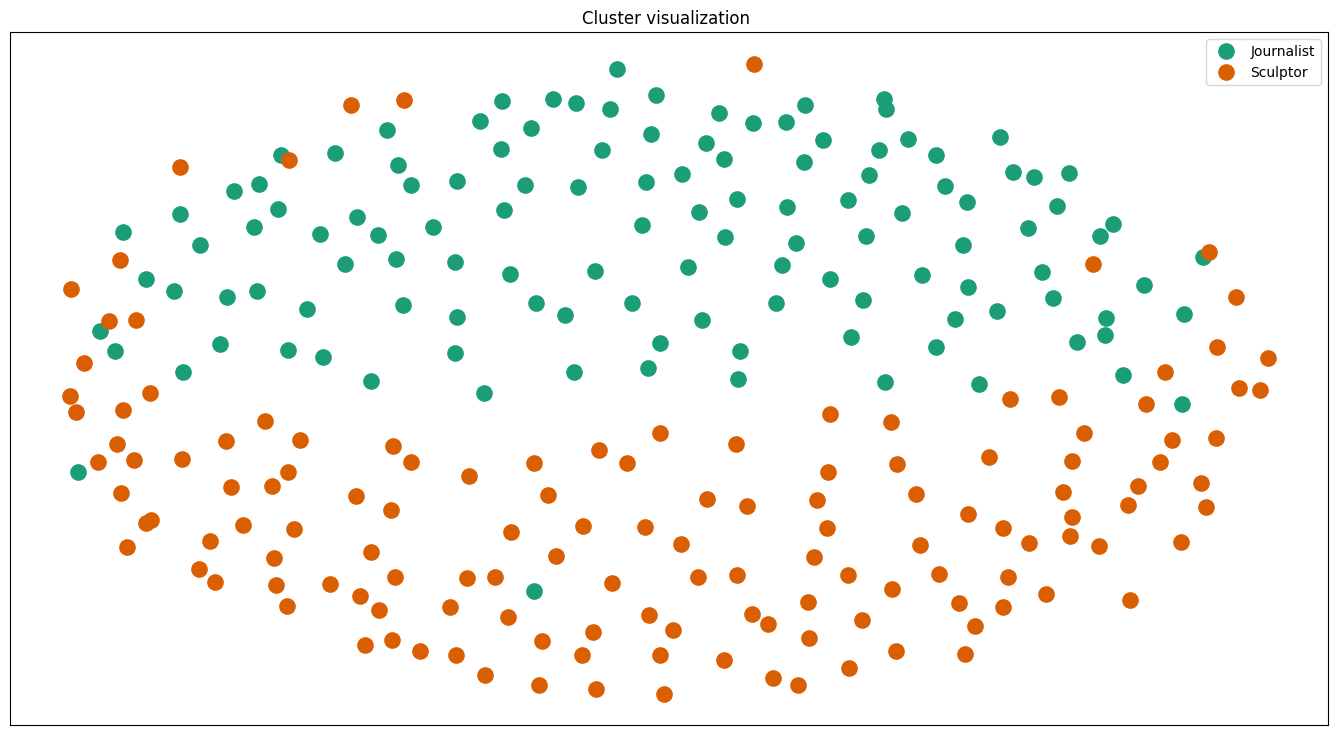

In [14]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS

dist = 1 - cosine_similarity(tfidf_matrix)

# Use multidimensional scaling to convert the dist matrix into a 2-dimensional array
MDS()

# n_components=2 to plot results in a two-dimensional plane
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)
xs, ys = pos[:, 0], pos[:, 1]

#set up colors per clusters
cluster_colors = {0: '#1b9e78', 1: '#d95f02'}

#set up cluster names
cluster_names = {0: 'Journalist', 1: 'Sculptor'}

#create data frame that has the result of the MDS plus the cluster numbers and titles

df = pd.DataFrame(dict(x=xs, y=ys, label=clusters))

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9))
ax.margins(0.05)

#iterate through groups to layer the plot
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
            label=cluster_names[name],
            color=cluster_colors[name],
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',
        which='both',
        bottom=False,
        top=False,
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',
        which='both',
        left=False,
        top=False,
        labelleft=False)

ax.legend(numpoints=1)
plt.title('Cluster visualization ')
plt.show()

## KG input  

In [15]:
# Load JSON data
with open('Biographies/knowledge_graph.json') as file:
    data = json.load(file)

In [16]:
# We want numerical data for category
category_mapping = {
    'Journalists': 0,
    'Sculptors': 1
}

entries = []
categories = []

# we make the choice to keep only what is after the last "/" in the URL of the fact values 
for category, people in data.items():
    for person in people:
        description = ". ".join([
            f"{extract_after_last_slash(str(binding['s']['value']))} {extract_after_last_slash(str(binding['p']['value']))} {extract_after_last_slash(str(binding['o']['value']))}"
            for binding in person['results']['bindings']
        ]) + "."
        entries.append(description)
        categories.append(category_mapping[category])  
        



# Create DataFrame
df_cluster = pd.DataFrame({'text': entries, 'category': categories})
df_cluster



,text,category
0,Perseu_Abramo hypernym Journalist. Wentworth_D...,0
1,Charles_Etienne_Boniface wikiPageWikiLink Supr...,0
2,Charles_Duluth subject Category:Fictional_jour...,0
3,Cindy_Campbell subject Category:Comedy_film_ch...,0
4,Carl_Diggler wikiPageWikiLink Hip_(slang). Car...,0
...,...,...
255,Wenzel_Profant owl#sameAs 174260199. Wenzel_Pr...,1
256,Agim_Rada prov#wasDerivedFrom Agim_Rada?oldid=...,1
257,Luis_Ramacciotti subject Category:Year_of_deat...,1
258,Omar_Rayo wikiPageWikiLink Latin_American_art....,1


In [17]:
print(df_cluster.groupby('category').size())

category
0    130
1    130
dtype: int64


In [18]:
# Shuffle the data
df_cluster = shuffle(df_cluster)


In [19]:
X = df_cluster['text']


In [20]:
# Using TFIDF vectorizer to convert convert words to Vector Space
# max_features = 800-1200 --> best metrics results
tfidf_vectorizer = TfidfVectorizer(max_features=900, use_idf=True, stop_words='english')
                                       

# Fit the vectorizer to text data
tfidf_matrix = tfidf_vectorizer.fit_transform(X)




In [21]:
features = tfidf_vectorizer.get_feature_names_out()
print(features)


['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '1822' '1875' '1882' '1883' '1888' '1889' '1892'
 '1895' '1898' '1899' '19' '1900' '1902' '1903' '1906' '1907' '1910'
 '1913' '1918' '1919' '1920' '1921' '1922' '1923' '1924' '1925' '1927'
 '1928' '1933' '1934' '1935' '1936' '1937' '1941' '1942' '1944' '1945'
 '1948' '1949' '1950' '1952' '1953' '1954' '1956' '1957' '1958' '1959'
 '1960' '1965' '1967' '1968' '1971' '1974' '1975' '1976' '1977' '1978'
 '1979' '1980' '1981' '1982' '1985' '1986' '1987' '1989' '1994' '1997'
 '19th' '20' '2001' '2002' '2003' '2005' '2007' '2008' '2009' '2010'
 '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2019' '2020' '20th'
 '21' '21st' '22' '23' '24' '25' '26' '27' '28' '30' '300' '31'
 '_arkadyevich_ureklyan' '_chop' '_echeverría' '_fernández' '_halpine'
 '_morecambe' '_r' '_ralph_casimir' '_roberto_eisenmann_jr'
 '_the_association_of_lgbtq_journalists' 'a_mighty_heart' 'a_reporter'
 'abdelkader_bensalah' 'abril

In [22]:

# Initialize and fit KMeans algorithm
km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, verbose=0, random_state=42)
km.fit(tfidf_matrix)

# Get cluster assignments for the training data
predicted_labels = km.labels_
clusters = predicted_labels.tolist()


print(predicted_labels[0:10])


[0 0 0 0 0 1 1 0 0 0]


In [23]:
texts = df_cluster['text'].values
labels = df_cluster['category'].values

data = {'text':texts,'category':labels,'cluster':clusters}
df_cluster = pd.DataFrame(data,columns=['text','category','cluster'])

In [24]:
#print( labels)
#print( km.labels_)

print("Supervised metrics:")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, km.labels_))
print("Unsupervised metric:")
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(tfidf_matrix, km.labels_))

print()

Supervised metrics:
Homogeneity: 0.013
Completeness: 0.024
V-measure: 0.016
Adjusted Rand-Index: 0.006
Unsupervised metric:
Silhouette Coefficient: 0.001



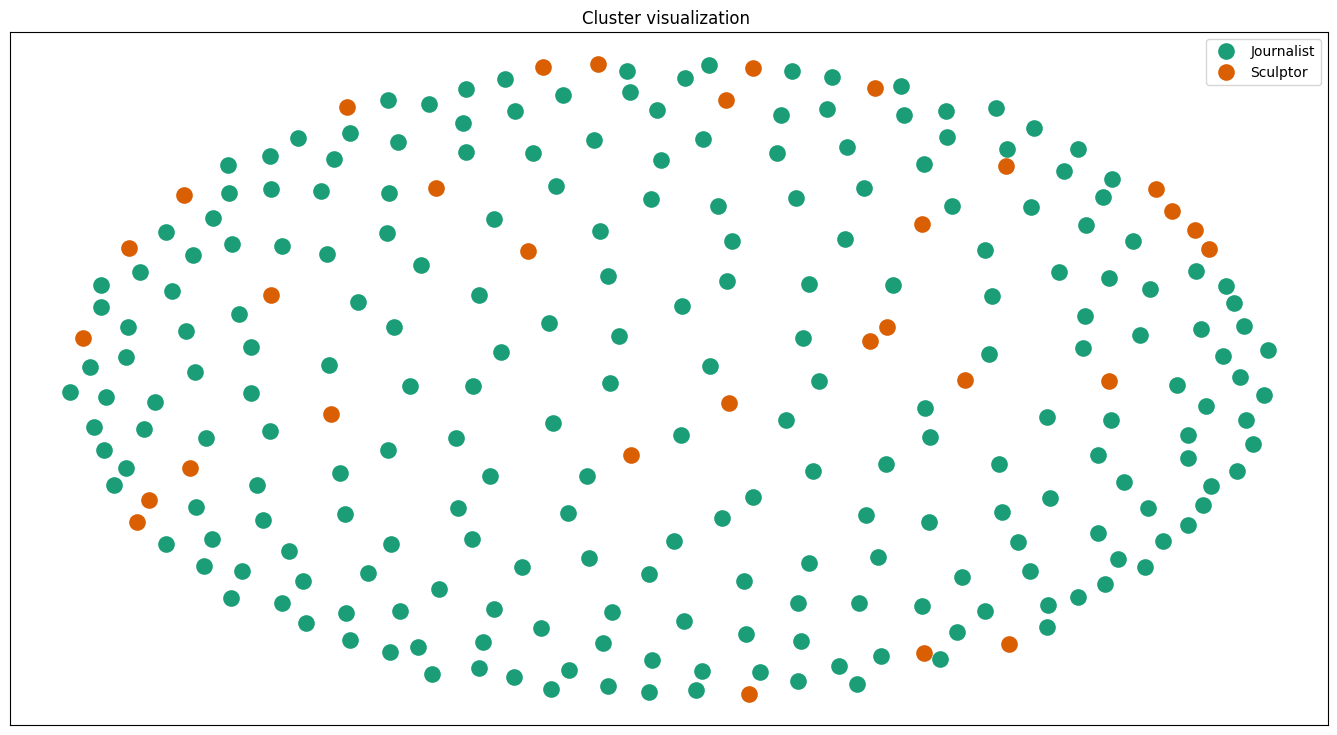

In [25]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

dist = 1 - cosine_similarity(tfidf_matrix)

# Use multidimensional scaling to convert the dist matrix into a 2-dimensional array
MDS()

# n_components=2 to plot results in a two-dimensional plane
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)
xs, ys = pos[:, 0], pos[:, 1]

#set up colors per clusters
cluster_colors = {0: '#1b9e77', 1: '#d95f02'}

#set up cluster names
cluster_names = {0: 'Journalist', 1: 'Sculptor'}

#create data frame that has the result of the MDS plus the cluster numbers and titles

df = pd.DataFrame(dict(x=xs, y=ys, label=clusters))

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9))
ax.margins(0.05)

#iterate through groups to layer the plot
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
            label=cluster_names[name],
            color=cluster_colors[name],
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',
        which='both',
        bottom=False,
        top=False,
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',
        which='both',
        left=False,
        top=False,
        labelleft=False)

ax.legend(numpoints=1)
plt.title('Cluster visualization ')
plt.show()

## DBSCAN #####

## Text input ####

In [26]:
# load the files and extract the text and category in a dataframe
DATA_DIR = "Biographies/"
data_cluster = load_files(DATA_DIR, encoding='utf-8', decode_error="replace")
df_cluster = pd.DataFrame(
    {'text': data_cluster['data'], 
    'category': data_cluster['target']})
df_cluster

,text,category
0,Pavlos Prosalentis (Greek: Παύλος Προσαλέντης;...,1
1,Scott Robinson is a fictional character from t...,0
2,Ricardo Breceda is an artist most well known f...,1
3,"Luis Aranberri (born 1945 in Eibar), better kn...",0
4,Gerhard Henning (27 May 1880 – 16 September 19...,1
...,...,...
255,"Kayode Akintemi (born June 26, 1965) is a Nige...",0
256,"José Belloni (September 12, 1882 – November 2...",1
257,"Thomas Henry Shadwell Clerke, KH (1792–1849), ...",0
258,Hopewell Rugoho-Chin'ono is a Zimbabwean journ...,0


In [27]:
bio = df_cluster["text"]


In [28]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000, use_idf=True, stop_words='english')

# Fit the vectorizer to text data
tfidf_matrix = tfidf_vectorizer.fit_transform(bio)



In [29]:

dbscan = DBSCAN(eps=1, min_samples=4)

dbscan.fit(tfidf_matrix)

cluster_labels = dbscan.fit_predict(tfidf_matrix.toarray())
labels = df_cluster["category"].values



In [30]:
no_clusters = len(np.unique(cluster_labels)) # obtain the number of clusters
no_noise = np.sum(np.array(cluster_labels) == -1) # obtain the noise

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

print(cluster_labels)

Estimated no. of clusters: 3
Estimated no. of noise points: 85
[ 0 -1  0 -1 -1 -1  0  0  0  0  0  0 -1  0  0  0 -1  0  0  0  0  0 -1 -1
  0 -1  0 -1  0 -1 -1 -1  0  0 -1  0  0  0  0  0  0 -1 -1  0  0  0 -1 -1
 -1 -1  0  1 -1 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0 -1
 -1  0  0  0 -1  0  0  0  0 -1  0 -1  0  0 -1 -1  0 -1  0  0  0  0 -1 -1
  0 -1 -1  0 -1  0  0  0 -1  0  0  0 -1  0  0  0  0  0  0 -1  0  0  0  0
  0  0 -1  0 -1  0 -1 -1  0  0  0 -1  0  0  0 -1 -1  0  0 -1  0  0  0  0
  0  0  0 -1 -1 -1  0  0 -1 -1 -1 -1  0 -1 -1 -1  0  0 -1  0  0  1 -1  0
  0 -1  0  0  0  0  0  0  0 -1  0 -1  0  0  0  0  0  0 -1  0  0 -1  0  0
 -1  0 -1  0 -1  0  0  0  1  0  0 -1  0 -1  0 -1 -1  0  0  0 -1  0 -1  0
  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0 -1 -1  0 -1  0  0  1  0
  0  0  0  0 -1  0  0  0  0 -1  0 -1  0  0  0  0 -1  0 -1 -1]


In [31]:
print("Supervised metrics:")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, cluster_labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels, cluster_labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, cluster_labels))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, cluster_labels))
print("Unsupervised metric:")
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(tfidf_matrix, cluster_labels))

print()


Supervised metrics:
Homogeneity: 0.016
Completeness: 0.015
V-measure: 0.016
Adjusted Rand-Index: -0.003
Unsupervised metric:
Silhouette Coefficient: -0.006



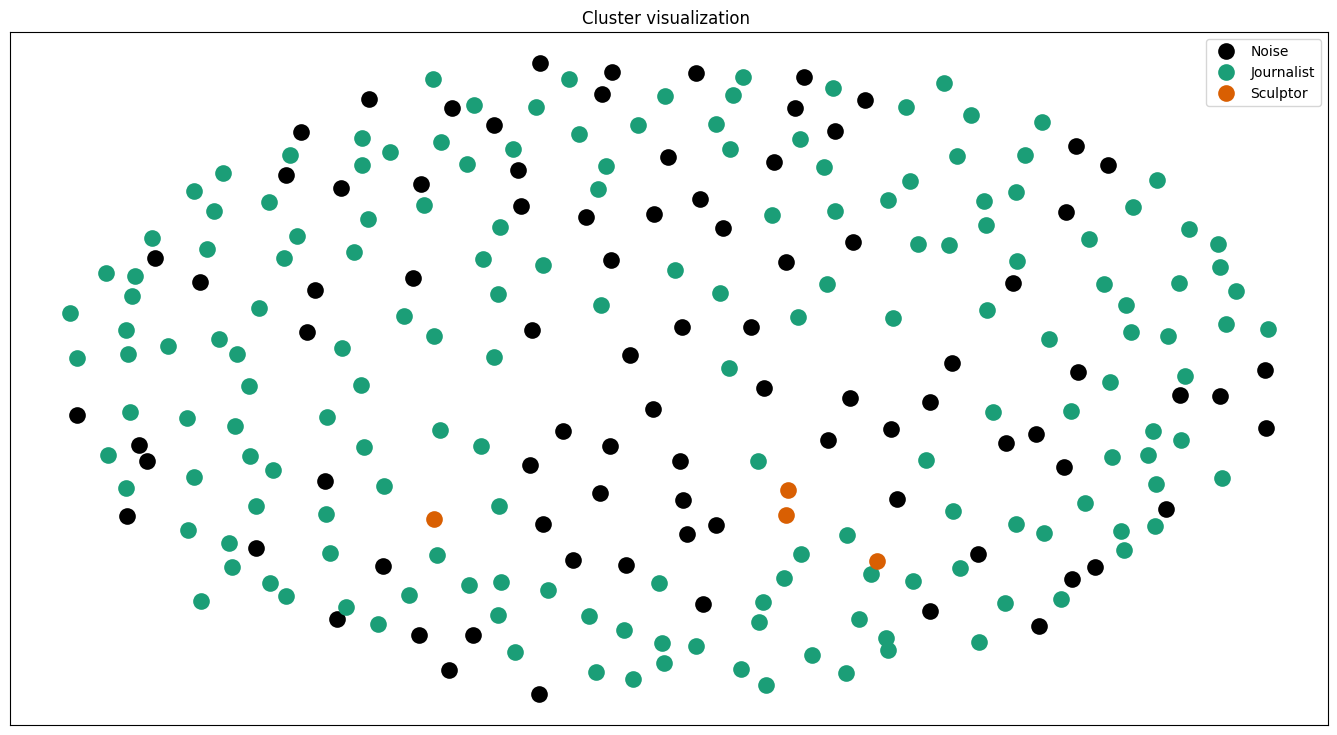

In [32]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_matrix.toarray())

dist = 1 - cosine_similarity(tfidf_matrix)

# Use multidimensional scaling to convert the dist matrix into a 2-dimensional array
MDS()

# n_components=2 to plot results in a two-dimensional plane
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)
xs, ys = pos[:, 0], pos[:, 1]

#set up colors per clusters
cluster_colors = {0: '#1b9e77', 1: '#d95f02', -1: '#000000' }

#set up cluster names
cluster_names = {0: 'Journalist', 1: 'Sculptor', -1 : 'Noise'}

#create data frame that has the result of the MDS plus the cluster numbers and titles

df = pd.DataFrame(dict(x=xs, y=ys, label=cluster_labels))

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9))
ax.margins(0.05)

#iterate through groups to layer the plot
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
            label=cluster_names[name],
            color=cluster_colors[name],
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',
        which='both',
        bottom=False,
        top=False,
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',
        which='both',
        left=False,
        top=False,
        labelleft=False)

ax.legend(numpoints=1)
plt.title('Cluster visualization ')
plt.show()

## KG input ###

In [33]:
# Load JSON data
with open('Biographies/knowledge_graph.json') as file:
    data = json.load(file)

In [34]:
category_mapping = {
    'Journalists': 0,
    'Sculptors': 1
}

entries = []
categories = []

for category, people in data.items():
    for person in people:
        description = ". ".join([
            f"{extract_after_last_slash(str(binding['s']['value']))} {extract_after_last_slash(str(binding['p']['value']))} {extract_after_last_slash(str(binding['o']['value']))}"
            for binding in person['results']['bindings']
        ]) + "."
        entries.append(description)
        categories.append(category_mapping[category])  
        



# Create DataFrame
df_cluster = pd.DataFrame({'text': entries, 'category': categories})
df_cluster

,text,category
0,Perseu_Abramo hypernym Journalist. Wentworth_D...,0
1,Charles_Etienne_Boniface wikiPageWikiLink Supr...,0
2,Charles_Duluth subject Category:Fictional_jour...,0
3,Cindy_Campbell subject Category:Comedy_film_ch...,0
4,Carl_Diggler wikiPageWikiLink Hip_(slang). Car...,0
...,...,...
255,Wenzel_Profant owl#sameAs 174260199. Wenzel_Pr...,1
256,Agim_Rada prov#wasDerivedFrom Agim_Rada?oldid=...,1
257,Luis_Ramacciotti subject Category:Year_of_deat...,1
258,Omar_Rayo wikiPageWikiLink Latin_American_art....,1


In [35]:
print(df_cluster.groupby('category').size())

category
0    130
1    130
dtype: int64


In [36]:
bio = df_cluster['text']

In [37]:
tfidf_vectorizer = TfidfVectorizer(max_features=700,  use_idf=True, stop_words='english')
                                       

# Fit the vectorizer to text data
tfidf_matrix = tfidf_vectorizer.fit_transform(bio)

In [38]:
dbscan = DBSCAN(eps=1, min_samples=4)

dbscan.fit(tfidf_matrix)

cluster_labels = dbscan.fit_predict(tfidf_matrix.toarray())
labels = df_cluster["category"].values




In [39]:
no_clusters = len(np.unique(cluster_labels))
no_noise = np.sum(np.array(cluster_labels) == -1)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

print(cluster_labels)

Estimated no. of clusters: 2
Estimated no. of noise points: 255
[-1 -1  0 -1 -1 -1 -1  0  0  0 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [40]:
print("Supervised metrics:")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, cluster_labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels, cluster_labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, cluster_labels))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, cluster_labels))
print("Unsupervised metric:")
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(tfidf_matrix, cluster_labels, sample_size=1000))

print()

Supervised metrics:
Homogeneity: 0.020
Completeness: 0.142
V-measure: 0.034
Adjusted Rand-Index: 0.001
Unsupervised metric:
Silhouette Coefficient: -0.011



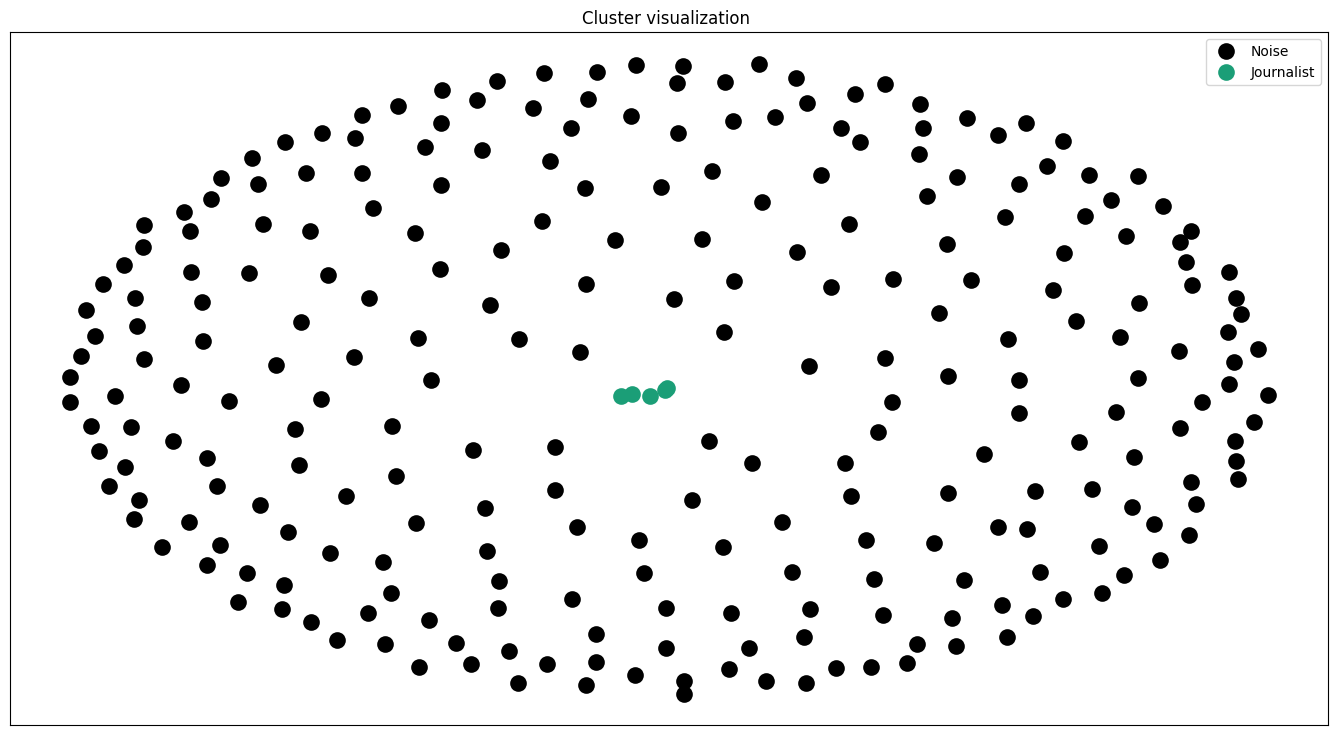

In [41]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_matrix.toarray())

dist = 1 - cosine_similarity(tfidf_matrix)

# Use multidimensional scaling to convert the dist matrix into a 2-dimensional array
MDS()

# n_components=2 to plot results in a two-dimensional plane
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)
xs, ys = pos[:, 0], pos[:, 1]

#set up colors per clusters
cluster_colors = {0: '#1b9e77', 1: '#d95f02', -1: '#000000' }

#set up cluster names
cluster_names = {0: 'Journalist', 1: 'Sculptor', -1 : 'Noise'}

#create data frame that has the result of the MDS plus the cluster numbers and titles

df = pd.DataFrame(dict(x=xs, y=ys, label=cluster_labels))

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9))
ax.margins(0.05)

#iterate through groups to layer the plot
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
            label=cluster_names[name],
            color=cluster_colors[name],
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',
        which='both',
        bottom=False,
        top=False,
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',
        which='both',
        left=False,
        top=False,
        labelleft=False)

ax.legend(numpoints=1)
plt.title('Cluster visualization ')
plt.show()

## Agglomerative clustering ######

## Text input #####

In [42]:

# Chargement des données
DATA_DIR = "Biographies/"
data_cluster = load_files(DATA_DIR, encoding='utf-8', decode_error="replace")
df_cluster = pd.DataFrame(
    {'text': data_cluster['data'], 
     'category': data_cluster['target']})



In [43]:
bio = df_cluster["text"]

tfidf_vectorizer = TfidfVectorizer(max_features=1000, use_idf=True, stop_words='english')

tfidf_matrix = tfidf_vectorizer.fit_transform(bio)

In [44]:
# configuration of Agglomerative clustering

agg_clust = AgglomerativeClustering(n_clusters=2)

# apply the clustering
cluster_labels = agg_clust.fit_predict(tfidf_matrix.toarray())

labels = df_cluster['category'].values



In [45]:

print("Supervised metrics:")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, cluster_labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels, cluster_labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, cluster_labels))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, cluster_labels))
print("Unsupervised metric:")
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(tfidf_matrix, cluster_labels))

print()


Supervised metrics:
Homogeneity: 0.523
Completeness: 0.524
V-measure: 0.523
Adjusted Rand-Index: 0.626
Unsupervised metric:
Silhouette Coefficient: 0.016



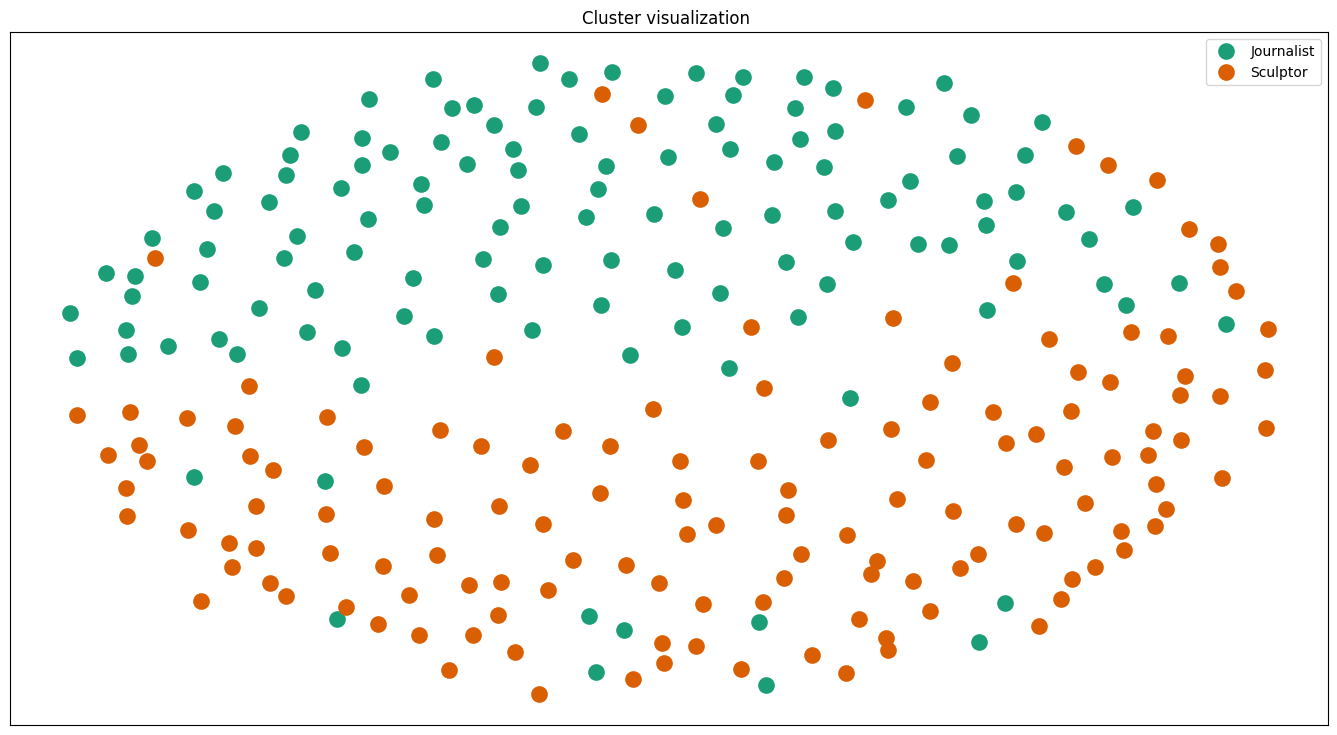

In [46]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

dist = 1 - cosine_similarity(tfidf_matrix)

# Use multidimensional scaling to convert the dist matrix into a 2-dimensional array
MDS()

# n_components=2 to plot results in a two-dimensional plane
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)
xs, ys = pos[:, 0], pos[:, 1]

#set up colors per clusters
cluster_colors = {0: '#1b9e77', 1: '#d95f02'}

#set up cluster names
#cluster_names = {0: 'Other', 1: 'Chemistry', 2: 'Physics'}
cluster_names = {0: 'Journalist', 1: 'Sculptor'}

#create data frame that has the result of the MDS plus the cluster numbers and titles

df = pd.DataFrame(dict(x=xs, y=ys, label=agg_clust.labels_.tolist()))

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9))
ax.margins(0.05)

#iterate through groups to layer the plot
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
            label=cluster_names[name],
            color=cluster_colors[name],
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',
        which='both',
        bottom=False,
        top=False,
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',
        which='both',
        left=False,
        top=False,
        labelleft=False)

ax.legend(numpoints=1)
plt.title('Cluster visualization ')
plt.show()

## KG graph input ####

In [47]:
# Load JSON data
with open('Biographies/knowledge_graph.json') as file:
    data = json.load(file)

In [48]:
category_mapping = {
    'Journalists': 0,
    'Sculptors': 1
}

entries = []
categories = []

for category, people in data.items():
    for person in people:
        description = ". ".join([
            f"{extract_after_last_slash(str(binding['s']['value']))} {extract_after_last_slash(str(binding['p']['value']))} {extract_after_last_slash(str(binding['o']['value']))}"
            for binding in person['results']['bindings']
        ]) + "."
        entries.append(description)
        categories.append(category_mapping[category])  
        



# Create DataFrame
df_cluster = pd.DataFrame({'text': entries, 'category': categories})
df_cluster

,text,category
0,Perseu_Abramo hypernym Journalist. Wentworth_D...,0
1,Charles_Etienne_Boniface wikiPageWikiLink Supr...,0
2,Charles_Duluth subject Category:Fictional_jour...,0
3,Cindy_Campbell subject Category:Comedy_film_ch...,0
4,Carl_Diggler wikiPageWikiLink Hip_(slang). Car...,0
...,...,...
255,Wenzel_Profant owl#sameAs 174260199. Wenzel_Pr...,1
256,Agim_Rada prov#wasDerivedFrom Agim_Rada?oldid=...,1
257,Luis_Ramacciotti subject Category:Year_of_deat...,1
258,Omar_Rayo wikiPageWikiLink Latin_American_art....,1


In [49]:
bio = df_cluster["text"]

# max_features = 700 --> best metrics results

tfidf_vectorizer = TfidfVectorizer(max_features=700,  use_idf=True, stop_words='english')
                                       

# Fit the vectorizer to text data
tfidf_matrix = tfidf_vectorizer.fit_transform(bio)



In [50]:
# configuration of Agglomerative clustering

agg_clust = AgglomerativeClustering(n_clusters=2)

# apply the clustering
cluster_labels = agg_clust.fit_predict(tfidf_matrix.toarray())

labels = df_cluster['category'].values


In [51]:

print("Supervised metrics:")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, cluster_labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels, cluster_labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, cluster_labels))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, cluster_labels))
print("Unsupervised metric:")
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(tfidf_matrix, cluster_labels))

print()


Supervised metrics:
Homogeneity: 0.020
Completeness: 0.142
V-measure: 0.034
Adjusted Rand-Index: 0.001
Unsupervised metric:
Silhouette Coefficient: -0.011



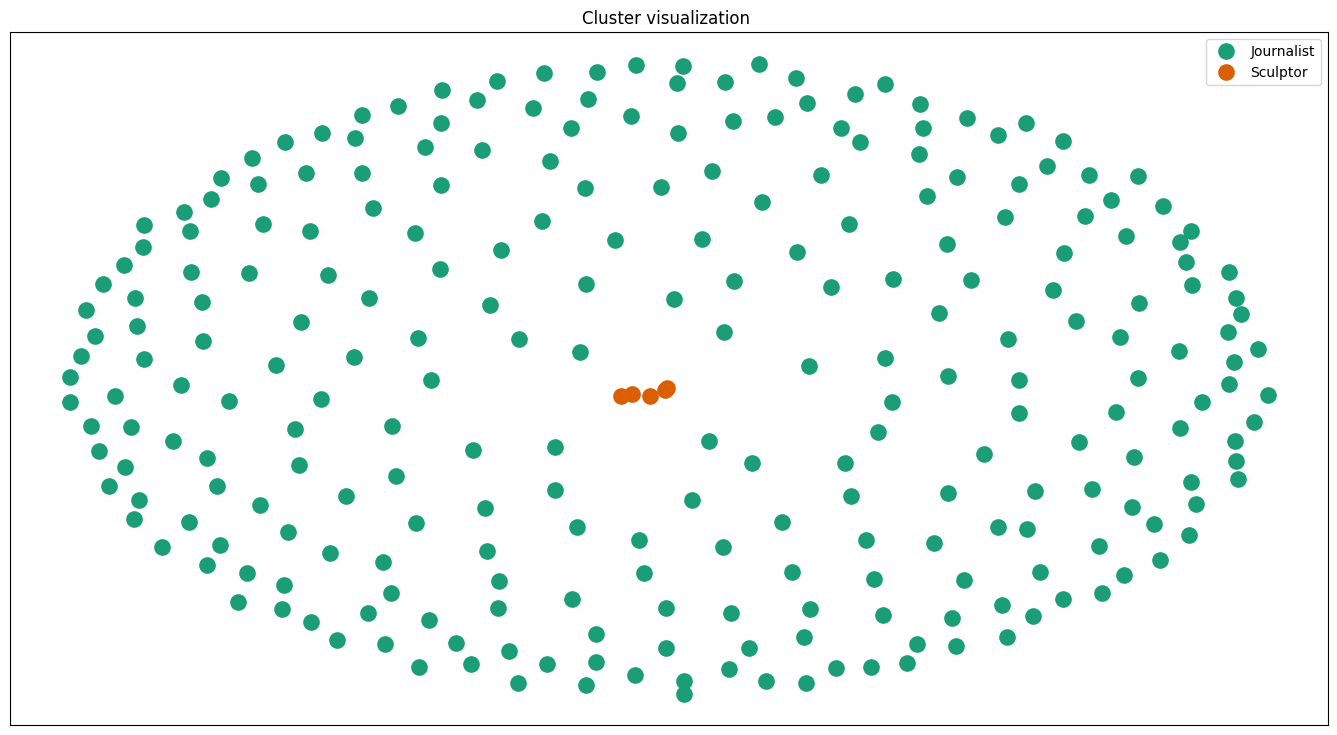

In [52]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

dist = 1 - cosine_similarity(tfidf_matrix)

# Use multidimensional scaling to convert the dist matrix into a 2-dimensional array
MDS()

# n_components=2 to plot results in a two-dimensional plane
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)
xs, ys = pos[:, 0], pos[:, 1]

#set up colors per clusters
cluster_colors = {0: '#1b9e77', 1: '#d95f02'}

#set up cluster names
cluster_names = {0: 'Journalist', 1: 'Sculptor'}

#create data frame that has the result of the MDS plus the cluster numbers and titles

df = pd.DataFrame(dict(x=xs, y=ys, label=agg_clust.labels_.tolist()))

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9))
ax.margins(0.05)

#iterate through groups to layer the plot
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
            label=cluster_names[name],
            color=cluster_colors[name],
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',
        which='both',
        bottom=False,
        top=False,
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',
        which='both',
        left=False,
        top=False,
        labelleft=False)

ax.legend(numpoints=1)
plt.title('Cluster visualization ')
plt.show()